# **Resources**

Description: https://dnrec.alpha.delaware.gov/climate-coastal-energy/renewable/assistance/

Dataset: https://data.delaware.gov/Energy-and-Environment/Green-Energy-Program-Grants/nsgd-n2gb

Reports: https://dnrec.alpha.delaware.gov/climate-coastal-energy/renewable/assistance/

# **1. Green Energy Program Grants (GEPG) Data**

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sodapy import Socrata
import pygris
import PyPDF2
import seaborn as sns
from scipy import stats
import json
pd.options.display.max_columns = 100

In [2]:
import GEPG

In [3]:
dataset_identifier = 
limit =20000
connection_string =  #azure_info['connection-str']
container_name = 

GEPG_df = GEPG.Get_most_recent_dataset(dataset_identifier,limit,connection_string,container_name)

Blob Green_Energy_Program_Grants_2023-12-15.csv downloaded successfully.
No new updates from the DODP, returning the most recent data from Azure container
Green_Energy_Program_Grants_2023-12-15.csv


In [4]:
GEPG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8016 entries, 0 to 8015
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   application_id               8016 non-null   object 
 1   city                         8016 non-null   object 
 2   zip                          8015 non-null   object 
 3   application_submission_date  8016 non-null   object 
 4   facility_type                8015 non-null   object 
 5   sector                       8016 non-null   object 
 6   pv_capacity_kw               6988 non-null   float64
 7   total_system_costs           8006 non-null   float64
 8   total_rebate                 8016 non-null   float64
 9   mounting_location            5777 non-null   object 
 10  ppa_lease                    5777 non-null   object 
 11  payment_status               8016 non-null   object 
 12  geothermal_capacity_tons     942 non-null    float64
 13  solar_water_capaci

In [5]:
GEPG_df.head()

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,geothermal_capacity_tons,solar_water_capacity_sq_ft,wind_capacity_kw
0,NR00001,Newark,19702,2002-02-28 00:00:00,PV,Non_Residential,29.00,137200.0,68600.0,NaN,NaN,Paid,NaN,NaN,NaN
1,NR00004,Newark,19702,2002-02-28 00:00:00,PV,Non_Residential,30.24,180260.0,63091.0,NaN,NaN,Paid,NaN,NaN,NaN
2,R00001,Newark,19702,2002-04-17 00:00:00,PV,Residential,4.00,40500.0,10500.0,NaN,NaN,Paid,NaN,NaN,NaN
3,R00002,Dagsboro,19939,2002-04-17 00:00:00,Geothermal,Residential,NaN,22512.0,2500.0,NaN,NaN,Paid,5.5,NaN,NaN
4,NR00002,Newark,19702,2002-07-03 00:00:00,PV,Non_Residential,341.61,2383225.0,741587.0,NaN,NaN,Paid,NaN,NaN,NaN


In [6]:
GEPG_df.isnull().sum()

application_id                    0
city                              0
zip                               1
application_submission_date       0
facility_type                     1
sector                            0
pv_capacity_kw                 1028
total_system_costs               10
total_rebate                      0
mounting_location              2239
ppa_lease                      2239
payment_status                    0
geothermal_capacity_tons       7074
solar_water_capacity_sq_ft     7953
wind_capacity_kw               7998
dtype: int64

In [7]:
GEPG_df.isnull().sum()*100/len(GEPG_df)

application_id                  0.000000
city                            0.000000
zip                             0.012475
application_submission_date     0.000000
facility_type                   0.012475
sector                          0.000000
pv_capacity_kw                 12.824351
total_system_costs              0.124750
total_rebate                    0.000000
mounting_location              27.931637
ppa_lease                      27.931637
payment_status                  0.000000
geothermal_capacity_tons       88.248503
solar_water_capacity_sq_ft     99.214072
wind_capacity_kw               99.775449
dtype: float64

# **2. Data Cleaning and Feature Engineering**

In [8]:
GEPG_df.drop(['geothermal_capacity_tons','solar_water_capacity_sq_ft','wind_capacity_kw'],axis=1,inplace=True)

In [9]:
GEPG_df[GEPG_df['zip'].isnull()]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status
15,NR00003,Lost due to Fire,NaN,2003-04-07 00:00:00,Geothermal,Non_Residential,NaN,NaN,25000.0,NaN,NaN,Paid


In [10]:
GEPG_df.drop(GEPG_df[GEPG_df['zip'].isnull()].any(axis=1).index,inplace=True)

In [11]:
GEPG_df['Zip5digits'] = GEPG_df['zip'].apply(lambda x: x[:5] )

In [12]:
GEPG_df['Zip5digits']

0       19702
1       19702
2       19702
3       19939
4       19702
        ...  
8011    19971
8012    19943
8013    19709
8014    19701
8015    19801
Name: Zip5digits, Length: 8015, dtype: object

In [13]:
GEPG_df.groupby('Zip5digits').count().sort_values(by='application_id')

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status
Zip5digits,,,,,,,,,,,,
1073,1,1,1,1,1,1,0,1,1,0,0,1
23323,1,1,1,1,1,1,0,1,1,0,0,1
22180,1,1,1,1,1,1,1,1,1,1,1,1
21012,1,1,1,1,1,1,1,1,1,1,1,1
20814,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19702,492,492,492,492,492,492,479,492,492,443,443,492
19720,497,497,497,497,497,497,492,497,497,443,443,497
19701,625,625,625,625,625,625,595,625,625,526,526,625


In [14]:
GEPG_df[GEPG_df['Zip5digits'].astype('int64') >= 20000]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits
2054,5238,Rehoboth Beach,89119,2014-10-16 15:14:00,PV,residential,5355.0,26775.0,4338.75,rooftop,lease,Paid,89119
2070,5287,Bear,94607,2014-10-21 01:24:00,PV,residential,9000.0,35460.0,5250.00,rooftop,lease,Unpaid,94607
4275,9225,Annapolis,21012,2017-04-23 19:46:00,PV,residential,5000.0,6120.0,2500.00,rooftop,owned,Unpaid,21012
4359,8370,Bethany Beach,20814,2017-08-02 17:07:00,PV,residential,8250.0,16900.0,3300.00,rooftop,owned,Paid,20814
4981,5104,Chesapeake,23323,2020-06-18 16:42:00,Wind,non_residential,NaN,8.0,17750.00,NaN,NaN,Unpaid,23323
6385,11627,Ocean View,22180,2022-10-06 11:24:00,PV,residential,11200.0,23632.0,8000.00,rooftop,owned,Unpaid,22180


In [15]:
len(GEPG_df[GEPG_df['Zip5digits'].astype('int64') >= 20000])

6

In [16]:
GEPG_df[GEPG_df['Zip5digits'].astype('int64') <= 19700]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits
3994,8812,New Castle,17920,2016-12-20 14:39:00,PV,residential,3640.0,26260.0,1000.0,rooftop,lease,Paid,17920
5004,10039,Newark,19173,2020-07-07 20:10:00,PV,residential,11840.0,45954.0,5000.0,rooftop,owned,Paid,19173
5972,11110,Newark,19173,2022-03-30 09:08:00,PV,residential,7200.0,75000.0,5040.0,rooftop,owned,Paid,19173
6136,11333,SOUTHAMPTON,1073,2022-06-23 11:11:00,Geothermal,residential,NaN,9400.0,5000.0,NaN,NaN,Unpaid,1073
6247,11421,Wilmington,18903,2022-08-25 08:59:00,PV,residential,13320.0,79920.0,5760.0,rooftop,owned,Unpaid,18903
6904,12218,South Bethany,19330,2023-02-24 00:21:00,PV,residential,8075.0,24647.0,6460.0,rooftop,owned,Unpaid,19330
7693,12913,Dover,19001,2023-08-18 16:04:00,PV,residential,7020.0,13555.0,4914.0,rooftop,owned,Unpaid,19001


In [17]:
GEPG_df = GEPG_df[(GEPG_df['Zip5digits'].astype('int64') >= 19700) & (GEPG_df['Zip5digits'].astype('int64') < 20000)]

In [18]:
GEPG_df.drop(['application_id','zip'],axis=1,inplace=True)

In [19]:
GEPG_df['date'] = pd.to_datetime(GEPG_df['application_submission_date'])

In [20]:
GEPG_df['year'] = GEPG_df['date'].dt.strftime('%Y')

In [21]:
GEPG_df['month'] = GEPG_df['date'].dt.strftime('%m')

In [22]:
GEPG_df.drop(['application_submission_date'],axis=1,inplace=True)

In [23]:
GEPG_df.drop(GEPG_df[GEPG_df['facility_type'].isnull()].index,axis=0,inplace=True)

<Axes: xlabel='facility_type'>

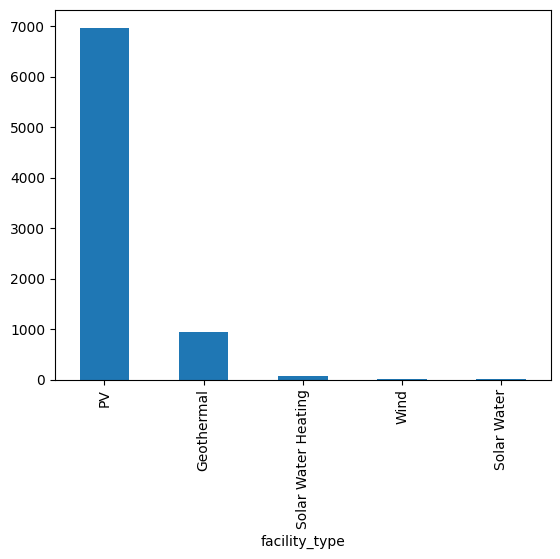

In [24]:
GEPG_df['facility_type'].value_counts().plot.bar()

In [25]:
GEPG_df['sector'] = GEPG_df['sector'].str.lower()

<Axes: xlabel='sector'>

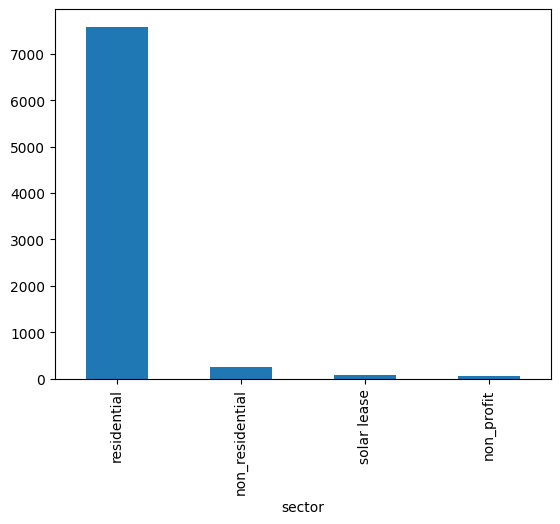

In [26]:
GEPG_df['sector'].value_counts().plot.bar()

In [27]:
GEPG_df.drop(GEPG_df[(GEPG_df['facility_type']=='PV') & 
                     (GEPG_df['pv_capacity_kw'].isnull())].index,axis=0,inplace=True)

In [28]:
GEPG_df['pv_capacity_kw'] = GEPG_df['pv_capacity_kw'].fillna(value=0)

In [29]:
GEPG_df['pv_capacity_kw'] = GEPG_df['pv_capacity_kw'].astype('float')

In [30]:
GEPG_df[GEPG_df['facility_type']=='PV']['pv_capacity_kw'].describe()

count      6977.000000
mean       8236.101223
std       20898.217415
min           0.300000
25%        4290.000000
50%        7140.000000
75%       10000.000000
max      921600.000000
Name: pv_capacity_kw, dtype: float64

In [31]:
GEPG_df['total_system_costs'] = GEPG_df['total_system_costs'].astype('float')

In [32]:
GEPG_df[GEPG_df['total_system_costs'].isnull()]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month
54,Rehoboth Beach,Geothermal,residential,0.00,NaN,3000.00,NaN,NaN,Paid,19971,2005-03-03,2005,03
1229,Rehoboth Beach,Geothermal,residential,0.00,NaN,3000.00,NaN,NaN,Paid,19971,2010-12-29,2010,12
1296,Newark,Geothermal,non_profit,0.00,NaN,14800.00,NaN,NaN,Paid,19711,2011-06-20,2011,06
1305,Claymont,Geothermal,residential,0.00,NaN,2300.00,NaN,NaN,Paid,19703,2011-07-07,2011,07
1357,Hockessin,Geothermal,residential,0.00,NaN,4400.00,NaN,NaN,Paid,19707,2011-09-12,2011,09
1363,Seaford,Geothermal,residential,0.00,NaN,3700.00,NaN,NaN,Paid,19973,2011-09-19,2011,09
1512,Wilmington,PV,non_residential,2.35,NaN,4993.75,NaN,NaN,Paid,19806,2012-05-09,2012,05
1855,Newark,Geothermal,residential,0.00,NaN,2300.00,NaN,NaN,Paid,19711,2013-09-26,2013,09
1868,Dewey Beach,Geothermal,residential,0.00,NaN,5000.00,NaN,NaN,Paid,19971,2013-10-15,2013,10


In [33]:
GEPG_df.drop(GEPG_df[GEPG_df['total_system_costs'].isnull()].index,axis=0,inplace=True)

In [34]:
GEPG_df['total_rebate'] = GEPG_df['total_rebate'].astype('float')

In [35]:
GEPG_df['payment_status'] = GEPG_df['payment_status'].str.lower()

In [36]:
GEPG_df['payment_status'].value_counts()

payment_status
paid           5672
unpaid         2002
pending         202
paid - arra     115
Name: count, dtype: int64

In [37]:
GEPG_df['mounting_location'].value_counts()

mounting_location
rooftop     5657
ground       108
tracking       1
Name: count, dtype: int64

In [38]:
GEPG_df[GEPG_df['mounting_location']=='tracking']

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month
4168,New Castle,PV,residential,2600.0,13655.0,1000.0,tracking,lease,paid,19720,2017-02-03 20:04:00,2017,02


In [39]:
GEPG_df['facility_type'].value_counts()

facility_type
PV                     6976
Geothermal              935
Solar Water Heating      62
Wind                     13
Solar Water               5
Name: count, dtype: int64

In [40]:
GEPG_PV_df = GEPG_df[GEPG_df['facility_type']=='PV']

In [41]:
GEPG_PV_df['mounting_location'].value_counts()

mounting_location
rooftop     5657
ground       108
tracking       1
Name: count, dtype: int64

In [42]:
GEPG_PV_df['mounting_location'].isnull().sum() * 100 / len(GEPG_PV_df['mounting_location'])

17.345183486238533

In [43]:
GEPG_df['mounting_location'].isnull().sum() * 100 / len(GEPG_df['mounting_location'])

27.84382430234013

In [44]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month


In [45]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['mounting_location'].notnull())]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month


In [46]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'solar lease', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('lease')

In [47]:
GEPG_PV_df.isnull().sum()

city                     0
facility_type            0
sector                   0
pv_capacity_kw           0
total_system_costs       0
total_rebate             0
mounting_location     1125
ppa_lease             1210
payment_status           0
Zip5digits               0
date                     0
year                     0
month                    0
dtype: int64

In [48]:
GEPG_PV_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 8015
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                6976 non-null   object        
 1   facility_type       6976 non-null   object        
 2   sector              6976 non-null   object        
 3   pv_capacity_kw      6976 non-null   float64       
 4   total_system_costs  6976 non-null   float64       
 5   total_rebate        6976 non-null   float64       
 6   mounting_location   5851 non-null   object        
 7   ppa_lease           5766 non-null   object        
 8   payment_status      6976 non-null   object        
 9   Zip5digits          6976 non-null   object        
 10  date                6976 non-null   datetime64[ns]
 11  year                6976 non-null   object        
 12  month               6976 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory us

In [49]:
GEPG_PV_df['sector'].value_counts() * 100 / len(GEPG_PV_df['sector'])

sector
residential        94.452408
non_residential     3.397362
solar lease         1.218463
non_profit          0.931766
Name: count, dtype: float64

In [50]:
GEPG_PV_df['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df['ppa_lease'])

ppa_lease
owned    57.153096
lease    17.588876
ppa       7.912844
Name: count, dtype: float64

In [51]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    97.826087
lease     2.173913
Name: count, dtype: float64

In [52]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_residential', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [53]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    92.0
lease     8.0
Name: count, dtype: float64

In [54]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_profit', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [55]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    68.474395
lease    21.710526
ppa       9.815078
Name: count, dtype: float64

In [56]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='lease')].head()

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month
1952,Wilmington,PV,residential,9555.0,39940.0,5388.75,rooftop,lease,paid,19805,2014-08-07 23:34:00,2014,08
1955,Middletown,PV,residential,8820.0,41542.0,5205.00,rooftop,lease,unpaid,19709,2014-08-14 20:46:00,2014,08
1958,Bear,PV,residential,8085.0,38080.0,5021.25,rooftop,lease,pending,19701,2014-08-20 22:02:00,2014,08
1959,Newark,PV,residential,4410.0,20771.0,3748.50,rooftop,lease,pending,19713,2014-08-20 22:10:00,2014,08
1960,New Castle,PV,residential,1960.0,9232.0,1666.00,rooftop,lease,unpaid,19720,2014-08-20 22:55:00,2014,08


In [57]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='lease')]['year'].value_counts()

year
2016    470
2015    414
2017    198
2014    138
2018      1
Name: count, dtype: int64

In [58]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='ppa')]['year'].value_counts()

year
2016    301
2015    104
2017     84
2014     63
Name: count, dtype: int64

In [59]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='owned')]['year'].value_counts()

year
2023    1303
2022     819
2021     554
2020     259
2015     201
2019     191
2016     169
2018     168
2017     140
2014      47
Name: count, dtype: int64

In [60]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].isnull())]['year'].value_counts()

year
2008    184
2009    177
2013    150
2012    137
2010    128
2011     96
2007     51
2006     32
2005      4
2002      2
2003      2
2004      2
Name: count, dtype: int64

Since all of the missing values are older than 2014, and since residential sector is owned, we assign them as owned.

In [61]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'residential', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [62]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

Series([], Name: count, dtype: float64)

In [63]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].isnull())]['year'].value_counts()

year
2013    65
2012    15
2011     5
Name: count, dtype: int64

In [64]:
GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index

Index([1393, 1394, 1397, 1398, 1399, 1478, 1518, 1519, 1520, 1528, 1560, 1566,
       1594, 1610, 1612, 1613, 1614, 1628, 1649, 1651, 1682, 1685, 1697, 1700,
       1701, 1710, 1715, 1716, 1732, 1738, 1739, 1740, 1760, 1761, 1764, 1767,
       1768, 1769, 1770, 1779, 1780, 1782, 1784, 1785, 1787, 1788, 1790, 1791,
       1792, 1799, 1811, 1812, 1829, 1836, 1837, 1843, 1848, 1851, 1852, 1861,
       1862, 1867, 1870, 1872, 1873, 1875, 1876, 1878, 1880, 1893, 1895, 1896,
       1907, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1935, 1940, 1943, 1947,
       1948],
      dtype='int64')

In [65]:
GEPG_PV_df.drop(GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index,axis=0,inplace=True)

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_28331/4284379894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEPG_PV_df.drop(GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index,axis=0,inplace=True)


In [66]:
GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index

Index([], dtype='int64')

In [67]:
GEPG_PV_df.isnull().sum()

city                     0
facility_type            0
sector                   0
pv_capacity_kw           0
total_system_costs       0
total_rebate             0
mounting_location     1125
ppa_lease                0
payment_status           0
Zip5digits               0
date                     0
year                     0
month                    0
dtype: int64

In [68]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop     98.275249
ground       1.706970
tracking     0.017781
Name: count, dtype: float64

In [69]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'residential', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [70]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop    94.0
ground      6.0
Name: count, dtype: float64

In [71]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_profit', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [72]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop    90.217391
ground      9.782609
Name: count, dtype: float64

In [73]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential')  
           & (GEPG_PV_df['mounting_location']=='ground')]['pv_capacity_kw'].describe()

count         9.000000
mean     149323.333333
std      265001.636504
min       14820.000000
25%       48000.000000
50%       50000.000000
75%       92800.000000
max      849250.000000
Name: pv_capacity_kw, dtype: float64

In [74]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') 
           & (GEPG_PV_df['mounting_location']=='rooftop')]['pv_capacity_kw'].describe()

count        83.000000
mean      41213.012048
std       47677.796585
min        4575.000000
25%       18275.000000
50%       28835.000000
75%       49690.000000
max      325540.000000
Name: pv_capacity_kw, dtype: float64

In [75]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') 
           & (GEPG_PV_df['mounting_location'].isnull())]['pv_capacity_kw'].describe()

count     145.000000
mean       46.377138
std       131.001573
min         1.456000
25%        10.000000
50%        20.700000
75%        43.350000
max      1433.970000
Name: pv_capacity_kw, dtype: float64

For non residential sector: The fact that the mean of pv_capacity for unknown mounting location is so much smaller that the mean pv_capacity for mounting location on rooftop, and given that rooftop installation is just more frequent, we assign all of the unknown mounting locations to rooftop. 

In [76]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_residential', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [77]:
GEPG_PV_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6891 entries, 0 to 8015
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                6891 non-null   object        
 1   facility_type       6891 non-null   object        
 2   sector              6891 non-null   object        
 3   pv_capacity_kw      6891 non-null   float64       
 4   total_system_costs  6891 non-null   float64       
 5   total_rebate        6891 non-null   float64       
 6   mounting_location   6891 non-null   object        
 7   ppa_lease           6891 non-null   object        
 8   payment_status      6891 non-null   object        
 9   Zip5digits          6891 non-null   object        
 10  date                6891 non-null   datetime64[ns]
 11  year                6891 non-null   object        
 12  month               6891 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory us

In [78]:
GEPG_PV_df.drop('facility_type',axis=1,inplace=True)

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_28331/3289123197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEPG_PV_df.drop('facility_type',axis=1,inplace=True)


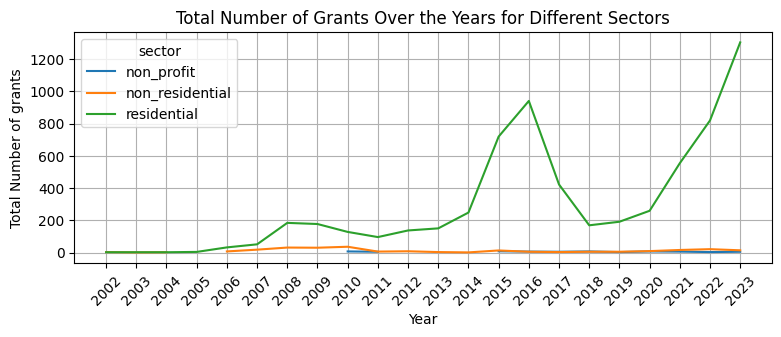

In [79]:
values_to_plot = ['residential', 'non_residential', 'non_profit']
data = GEPG_PV_df[GEPG_PV_df['sector'].isin(values_to_plot)].groupby(['year', 'sector']).size().unstack('sector')
data.plot.line(figsize=(9,3))
years = data.index.tolist()
plt.xticks(range(len(years)), years, rotation=45)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Total Number of grants')
plt.title('Total Number of Grants Over the Years for Different Sectors');

# **3. Mapping**

## 3.1. Exploring data

<Axes: xlabel='Zip5digits'>

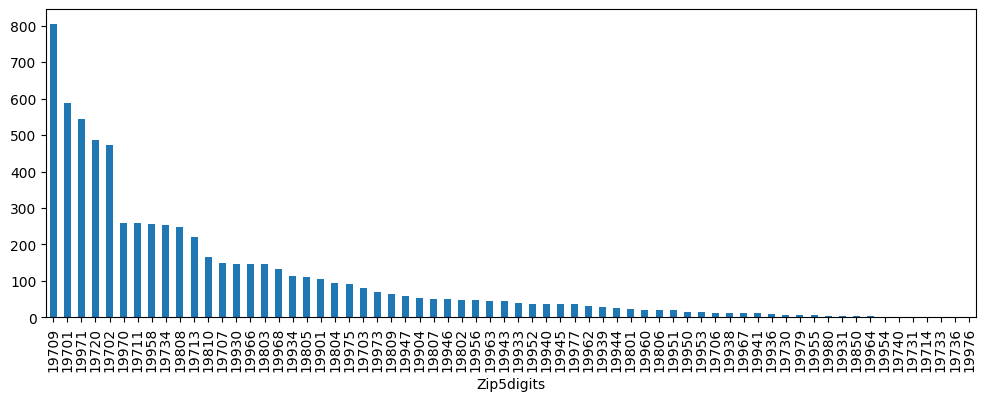

In [80]:
GEPG_PV_df['Zip5digits'].value_counts().plot.bar(figsize=(12,4))

In [81]:
year = '2020'

# Create shapefile query URL
city_shape_url = f"https://www2.census.gov/geo/tiger/TIGER{year}/PLACE/tl_{year}_10_place.zip"
city_gdf = gpd.read_file(city_shape_url)

In [82]:
city_gdf.head(1)

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,64840,02391407,1064840,Selbyville,Selbyville town,43,C1,N,N,G4110,A,9276309,19781,+38.4621805,-075.2147712,"POLYGON ((-75.25512 38.47784, -75.25305 38.478..."


Text(0.5, 1.0, 'Cities')

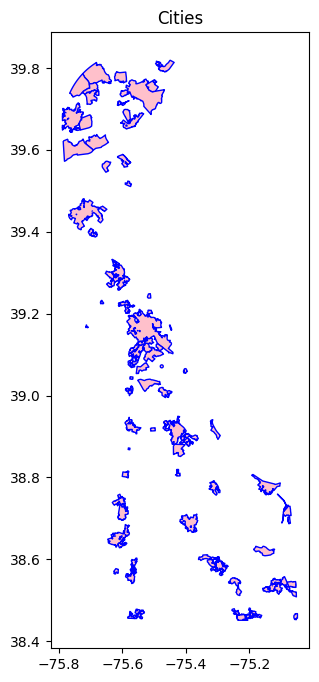

In [83]:
fig, ax = plt.subplots(figsize=(8,8))
city_gdf.plot(ax = ax, facecolor='pink',edgecolor='blue')
ax.set_title("Cities")

In [84]:
mapping_df = GEPG_PV_df.copy()

In [85]:
mapping_df['city'] = mapping_df['city'].str.lower()

In [86]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6891 entries, 0 to 8015
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                6891 non-null   object        
 1   sector              6891 non-null   object        
 2   pv_capacity_kw      6891 non-null   float64       
 3   total_system_costs  6891 non-null   float64       
 4   total_rebate        6891 non-null   float64       
 5   mounting_location   6891 non-null   object        
 6   ppa_lease           6891 non-null   object        
 7   payment_status      6891 non-null   object        
 8   Zip5digits          6891 non-null   object        
 9   date                6891 non-null   datetime64[ns]
 10  year                6891 non-null   object        
 11  month               6891 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 957.9+ KB


In [87]:
## Finding suspicious city names by identifying the ones not included in Census:

# Convert the "city" column in GEPG_PV_df to a set with lowercase city names
mapping_df_city_set = set(mapping_df['city'])

# Convert the "NAME" column in city_gdf to a set with lowercase city names
city_gdf_name_set = set(city_gdf['NAME'].str.lower())

# Find the names in city_set_gepg that are not in city_set_gdf
names_not_in_city_gdf = mapping_df_city_set - city_gdf_name_set

# Convert the result back to a list if needed
names_not_in_city_gdf_list = list(names_not_in_city_gdf)

# Print or work with the names that are in "city" but not in "NAME"
print(sorted(names_not_in_city_gdf_list))


['01 riblett ln wilmington', '19713', 'bea', 'bearr', 'bethany beach,', 'bridegeville', 'bridgville', 'camden wyoming', 'camden-wyoming', 'christiana', 'clarksville', 'claymonth', 'delmas', 'dewey', 'dover,', 'fenwick', 'frederica,', 'fredrica', 'harbeson', 'laruel', 'lewes de', 'marydel', 'midddletown', 'middeltown', 'middle town', 'middleton', 'middletown,', 'middletwon', 'midletown', 'milton de 19968', 'milton,', 'new castle county', 'new castle de', 'neward', 'newark,', 'newcastle', 'ocean  view', 'ocean veiw', 'oceanview', 'rehoboth', 'rehoboth beach de', 'rehoboth st', 'rohoboth beach', 's bethany', 's. bethany beach', 'selbyville de', 'selvyville', 'south bethany beach', 'st georges', 'townsednd', 'townsende', 'west hockessin', 'wilimington', 'wilmingon', 'wilmingont', 'wilmington,', 'wimington', 'yorklyn']


In [88]:
city_drop_list = ['19713', 'de', 'example', 'new castle county', 'new castle de', 'newcastle']
mapping_df = mapping_df.drop(mapping_df[mapping_df['city'].isin(city_drop_list)].index)

In [89]:
mapping_df['city'].replace({
    'bearr': 'bear',
    'bethany beach,': 'bethany beach',
    'bridegeville': 'bridgeville',
    'bridgville': 'bridgeville',
    'camden wyoming': 'camden',
    'camden-wyoming': 'camden',
    'claymonth': 'claymont',
    'delmas': 'delmar',
    'fredrica': 'frederica',
    'laruel': 'laurel',
    'lewes de': 'lewes',
    'midddletown': 'middletown',
    'middeltown': 'middletown',
    'middle town': 'middletown',
    'middleton': 'middletown',
    'middletwon': 'middletown',
    'midletown': 'middletown',
    'milton de 19968': 'milton',
    'neward': 'newark',
    'ocean veiw': 'ocean view',
    'ocean  view': 'ocean view',
    'rehoboth beach de': 'rehoboth beach',
    'rehoboth st': 'rehoboth', 
    'rohoboth beach': 'rehoboth beach',
    's bethany': 'bethany', 
    's. bethany beach': 'bethany beach',
    'selbyville de': 'selbyville', 
    'selvyville': 'selbyville',
    'south bethany beach': 'bethany beach',
    'st georges': 'saint georges',
    'townsednd': 'townsend',
    'townsende': 'townsend',
    'west hockessin': 'hockessin',
    'wilimington': 'wilmington', 
    'wilmingon': 'wilmington', 
    'wimington': 'wilmington',
    
}, inplace=True)

In [90]:
## Finding suspicious city names by identifying the ones not included in Census:

# Convert the "city" column in GEPG_PV_df to a set with lowercase city names
mapping_df_city_set = set(mapping_df['city'])

# Convert the "NAME" column in city_gdf to a set with lowercase city names
city_gdf_name_set = set(city_gdf['NAME'].str.lower())

# Find the names in city_set_gepg that are not in city_set_gdf
names_not_in_city_gdf = mapping_df_city_set - city_gdf_name_set

# Convert the result back to a list if needed
names_not_in_city_gdf_list = list(names_not_in_city_gdf)

# Print or work with the names that are in "city" but not in "NAME"
print(sorted(names_not_in_city_gdf_list))


['01 riblett ln wilmington', 'bea', 'bethany', 'christiana', 'clarksville', 'dewey', 'dover,', 'fenwick', 'frederica,', 'harbeson', 'marydel', 'middletown,', 'milton,', 'newark,', 'oceanview', 'rehoboth', 'saint georges', 'wilmingont', 'wilmington,', 'yorklyn']


In [91]:
## Finding city names have been assigned to more than one zip codes:

city_list = list(mapping_df['city'].unique())
for name in city_list:
    if len(list(mapping_df[mapping_df['city']==name]['Zip5digits'].value_counts().index)) > 1:
        zip_codes_list = list(mapping_df[mapping_df['city']==name]['Zip5digits'].value_counts().index)
        repetition_list = list(mapping_df[mapping_df['city']==name]['Zip5digits'].value_counts())
        print(name,":")
        for i in range(0,len(zip_codes_list)):
            print("    ",zip_codes_list[i],"(",repetition_list[i]," case)")

newark :
     19702 ( 466  case)
     19711 ( 259  case)
     19713 ( 220  case)
     19701 ( 3  case)
     19714 ( 1  case)
     19720 ( 1  case)
     19703 ( 1  case)
     19709 ( 1  case)
rehoboth beach :
     19971 ( 515  case)
     19977 ( 1  case)
     19951 ( 1  case)
     19958 ( 1  case)
wilmington :
     19808 ( 247  case)
     19810 ( 165  case)
     19803 ( 146  case)
     19805 ( 110  case)
     19804 ( 91  case)
     19809 ( 64  case)
     19802 ( 48  case)
     19807 ( 42  case)
     19801 ( 24  case)
     19806 ( 19  case)
     19850 ( 4  case)
new castle :
     19720 ( 478  case)
     19740 ( 1  case)
     19805 ( 1  case)
middletown :
     19709 ( 801  case)
     19720 ( 1  case)
     19707 ( 1  case)
bear :
     19701 ( 584  case)
     19702 ( 1  case)
     19707 ( 1  case)
townsend :
     19734 ( 254  case)
     19701 ( 1  case)
ocean view :
     19970 ( 236  case)
     19971 ( 1  case)
clarksville :
     19970 ( 11  case)
     19939 ( 1  case)
milton :
     19968 (

## 3.2. Geolocating based on city name

In [92]:
from geopy.geocoders import Nominatim

In [93]:
# Create a Nominatim geocoder instance
geolocator = Nominatim(user_agent="city_geocoder")

In [94]:
def get_lat_lon(city_name):
    location = geolocator.geocode(city_name + ", Delaware, USA")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [95]:
city_names = list(sorted(set(mapping_df['city'])))
city_coordinates = {'city': [], 'latitude': [], 'longitude': []}

for city_name in city_names:
    latitude, longitude = get_lat_lon(city_name)
    if latitude is not None and longitude is not None:
        city_coordinates['city'].append(city_name)
        city_coordinates['latitude'].append(latitude)
        city_coordinates['longitude'].append(longitude)
    else:
        print(f"There was an error with {city_name}")

# Convert the dictionary to a new DataFrame
city_coordinates_df = pd.DataFrame(city_coordinates)

# Merge city_coordinates_df with mapping_df based on the 'city' column
mapping_df = mapping_df.merge(city_coordinates_df, on='city', how='left')

There was an error with 01 riblett ln wilmington
There was an error with wilmingont


In [96]:
mapping_df.loc[mapping_df['city'] == 'middletown', ['latitude', 'longitude']] = (39.4495560, -75.7163207)

In [97]:
mapping_df.head(2)

,city,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month,latitude,longitude
0,newark,non_residential,29.00,137200.0,68600.0,rooftop,owned,paid,19702,2002-02-28,2002,02,39.682836,-75.751568
1,newark,non_residential,30.24,180260.0,63091.0,rooftop,owned,paid,19702,2002-02-28,2002,02,39.682836,-75.751568


In [98]:
# Create a GeoDataFrame from the latitude and longitude columns
geometry = gpd.points_from_xy(mapping_df['longitude'], mapping_df['latitude'])
mapping_gdf = gpd.GeoDataFrame(mapping_df, geometry=geometry)

In [99]:
mapping_gdf.head(2)

,city,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month,latitude,longitude,geometry
0,newark,non_residential,29.00,137200.0,68600.0,rooftop,owned,paid,19702,2002-02-28,2002,02,39.682836,-75.751568,POINT (-75.75157 39.68284)
1,newark,non_residential,30.24,180260.0,63091.0,rooftop,owned,paid,19702,2002-02-28,2002,02,39.682836,-75.751568,POINT (-75.75157 39.68284)


In [100]:
# Setting the CRS for mapping_gdf
mapping_gdf = mapping_gdf.set_crs(epsg=4269)

In [101]:
sldu_gdf = pygris.state_legislative_districts(state='DE',year=2021, cb=True)

Using FIPS code '10' for input 'DE'


Text(0.5, 1.0, '2021')

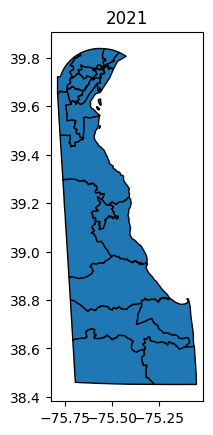

In [102]:
sldu_gdf.plot(edgecolor='black')
plt.title('2021')

In [103]:
sldu_gdf = pygris.state_legislative_districts(state='DE',year=2022, cb=True)

Using FIPS code '10' for input 'DE'


Text(0.5, 1.0, '2022')

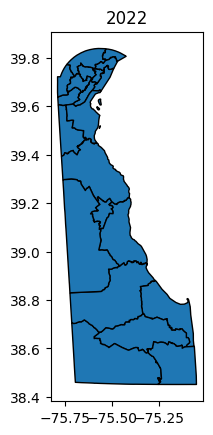

In [104]:
sldu_gdf.plot(edgecolor='black')
plt.title('2022')

## 3.3. Mapping Grant Receiving Cities

Creating maps of sldu with cities that have received grants in a specific year being identified as points:

In [105]:
# 2. Filter data for a specific year (e.g., 2020)
year_to_display = '2020'
filtered_gdf = mapping_gdf[mapping_gdf['year'] == year_to_display]

In [106]:
filtered_gdf.head(1)

,city,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month,latitude,longitude,geometry
3872,middletown,residential,17010.0,42300.0,3000.0,rooftop,owned,paid,19709,2020-01-10 18:17:00,2020,01,39.449556,-75.716321,POINT (-75.71632 39.44956)


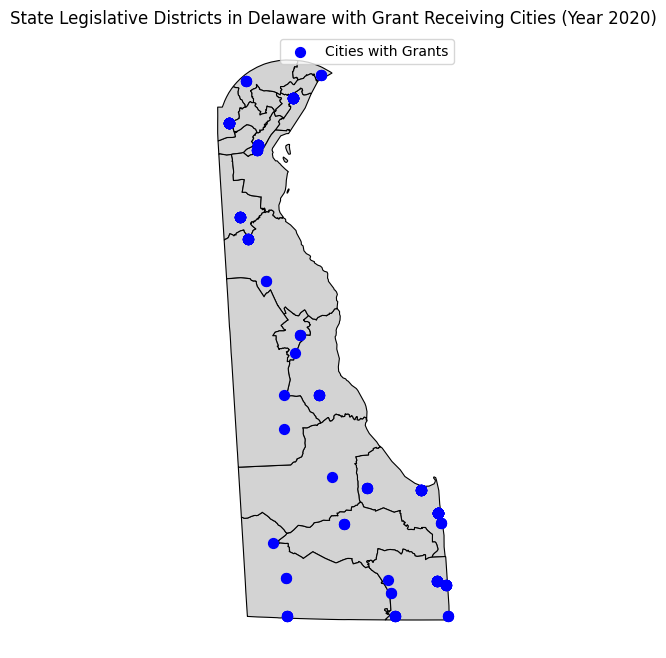

In [107]:
# 3. Create the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot legislative districts
sldu_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.8)

# Plot cities with grant data as points
filtered_gdf.plot(ax=ax, color='blue', markersize=50, label='Cities with Grants')

# Set plot title and legend
ax.set_title(f'State Legislative Districts in Delaware with Grant Receiving Cities (Year {year_to_display})')
# ax.set_xlim([-75.9, -74.9])
# ax.set_ylim([38.4, 39.95])
ax.set_axis_off()
ax.legend(loc=0);

## 3.4. Mappping Total Grants per SLDU

Creating maps of sldu with approximation of the total grants in a specific year identified as color gradient:

### 3.4.1. Determining corresponding distric for cities by performing spatial join

In [108]:
sldu_gdf = pygris.state_legislative_districts(state='DE',year=2022, cb=True);

Using FIPS code '10' for input 'DE'


In [109]:
# Perform the spatial join between legislative districts and grants data
joined_gdf = gpd.sjoin(sldu_gdf, mapping_gdf, how="left", op="intersects")

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [110]:
joined_gdf.head(1)

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry,index_right,city,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month,latitude,longitude
0,10,002,610U800US10002,10002,State Senate District 2,State Senate District 2,DE,Delaware,00,2022,41801454,32297985,"POLYGON ((-75.60360 39.66637, -75.60323 39.666...",4733.0,wilmington manor,residential,5460.0,29600.0,3822.0,rooftop,owned,paid,19720,2022-01-12 14:20:00,2022,01,39.68678,-75.584369


In [111]:
joined_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6885 entries, 0 to 20
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   STATEFP             6885 non-null   object        
 1   SLDUST              6885 non-null   object        
 2   AFFGEOID            6885 non-null   object        
 3   GEOID               6885 non-null   object        
 4   NAME                6885 non-null   object        
 5   NAMELSAD            6885 non-null   object        
 6   STUSPS              6885 non-null   object        
 7   STATE_NAME          6885 non-null   object        
 8   LSAD                6885 non-null   object        
 9   LSY                 6885 non-null   object        
 10  ALAND               6885 non-null   int64         
 11  AWATER              6885 non-null   int64         
 12  geometry            6885 non-null   geometry      
 13  index_right         6883 non-null   float64    

In [112]:
joined_gdf['SLDUST'].nunique()

21

In [113]:
joined_gdf[joined_gdf.isnull().any(axis=1)]['SLDUST'].tolist()

['011', '001']

In [114]:
joined_gdf[joined_gdf['SLDUST'].isin(joined_gdf[joined_gdf.isnull().any(axis=1)]['SLDUST'].tolist())]

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry,index_right,city,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month,latitude,longitude
5,10,011,610U800US10011,10011,State Senate District 11,State Senate District 11,DE,Delaware,00,2022,53022339,363366,"POLYGON ((-75.78754 39.63903, -75.78376 39.639...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
20,10,001,610U800US10001,10001,State Senate District 1,State Senate District 1,DE,Delaware,00,2022,33374070,7963536,"POLYGON ((-75.58733 39.77320, -75.58637 39.772...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


It is possible that these four districts have never received any grants. Let's drop them.

In [115]:
joined_gdf.drop(joined_gdf[joined_gdf.isnull().any(axis=1)].index,inplace=True)

### 3.4.2. Aggregating data for a single year and for a single sector

In [116]:
year_to_display = '2021'
sector = 'residential'
filtered_gdf = joined_gdf[(joined_gdf['year'] == year_to_display) & (joined_gdf['sector'] == sector)]

In [117]:
# Group and aggregate data by legislative district
agg_data = filtered_gdf.groupby('SLDUST').agg({
    'total_system_costs': ['sum','count'],
    'total_rebate': 'sum',
    'pv_capacity_kw': 'sum'
}).reset_index()

# Rename the columns for clarity
agg_data.columns = ['SLDUST', 'system_costs', 'system_count', 'rebate', 'capacity']

In [118]:
agg_data.head(2)

,SLDUST,system_costs,system_count,rebate,capacity
0,002,17607.0,1,2866.5,4095.0
1,003,2452649.0,74,370138.0,637265.0


In [119]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SLDUST        17 non-null     object 
 1   system_costs  17 non-null     float64
 2   system_count  17 non-null     int64  
 3   rebate        17 non-null     float64
 4   capacity      17 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 808.0+ bytes


### 3.4.3. Merge the aggregated data back into the sldu GeoDataFrame to give it district geometry

In [120]:
# Merge the aggregated data back into the legislative districts GeoDataFrame
sldu_gdf = sldu_gdf.merge(agg_data, left_on='SLDUST', right_on='SLDUST', how='left')

In [121]:
# As shown earlier, some districts did not receive grants. Let's set them to zero.
sldu_gdf.fillna(value=0, inplace=True);

In [122]:
sldu_gdf.head(1)

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry,system_costs,system_count,rebate,capacity
0,10,002,610U800US10002,10002,State Senate District 2,State Senate District 2,DE,Delaware,00,2022,41801454,32297985,"POLYGON ((-75.60360 39.66637, -75.60323 39.666...",17607.0,1.0,2866.5,4095.0


In [123]:
sldu_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   STATEFP       21 non-null     object  
 1   SLDUST        21 non-null     object  
 2   AFFGEOID      21 non-null     object  
 3   GEOID         21 non-null     object  
 4   NAME          21 non-null     object  
 5   NAMELSAD      21 non-null     object  
 6   STUSPS        21 non-null     object  
 7   STATE_NAME    21 non-null     object  
 8   LSAD          21 non-null     object  
 9   LSY           21 non-null     object  
 10  ALAND         21 non-null     int64   
 11  AWATER        21 non-null     int64   
 12  geometry      21 non-null     geometry
 13  system_costs  21 non-null     float64 
 14  system_count  21 non-null     float64 
 15  rebate        21 non-null     float64 
 16  capacity      21 non-null     float64 
dtypes: float64(4), geometry(1), int64(2), object(10)

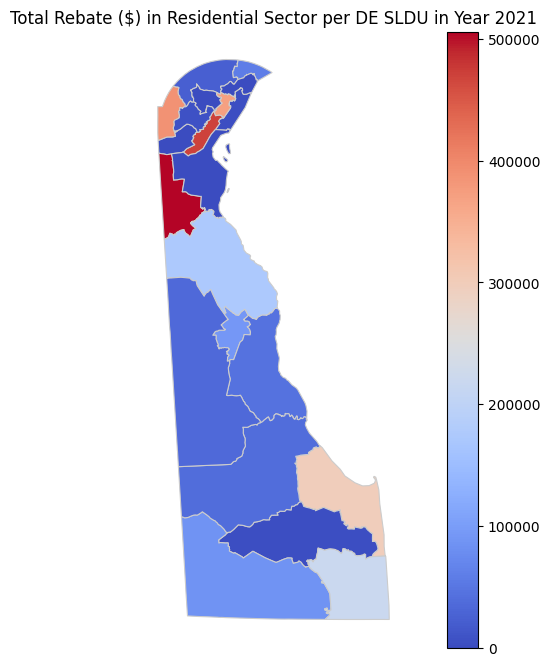

In [124]:
# Plot the legislative districts with color-coded features
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Choose the feature you want to visualize (e.g., 'total_system_costs')
feature_to_visualize = 'rebate'

# Plot the districts using color mapping based on the chosen feature
sldu_gdf.plot(column=feature_to_visualize, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize plot settings, such as title and legend
ax.set_title(f'Total Rebate ($) in Residential Sector per DE SLDU in Year {year_to_display}')
ax.set_axis_off()

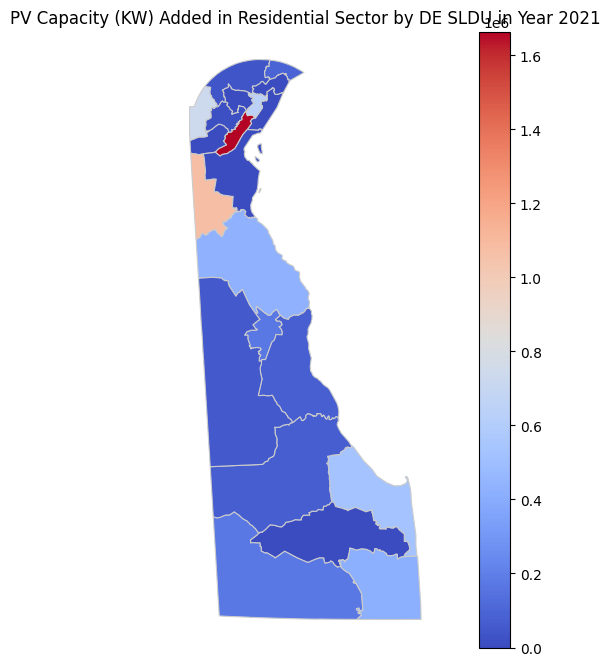

In [125]:
# Plot the legislative districts with color-coded features
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Choose the feature you want to visualize (e.g., 'total_system_costs')
feature_to_visualize = 'capacity'

# Plot the districts using color mapping based on the chosen feature
sldu_gdf.plot(column=feature_to_visualize, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize plot settings, such as title and legend
ax.set_title(f'PV Capacity (KW) Added in Residential Sector by DE SLDU in Year {year_to_display}')
ax.set_axis_off()

# 4. Creating Separate Dataframe for Sectors

In [126]:
joined_gdf.head(2)

,STATEFP,SLDUST,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry,index_right,city,sector,pv_capacity_kw,total_system_costs,total_rebate,mounting_location,ppa_lease,payment_status,Zip5digits,date,year,month,latitude,longitude
0,10,002,610U800US10002,10002,State Senate District 2,State Senate District 2,DE,Delaware,00,2022,41801454,32297985,"POLYGON ((-75.60360 39.66637, -75.60323 39.666...",4733.0,wilmington manor,residential,5460.0,29600.0,3822.0,rooftop,owned,paid,19720,2022-01-12 14:20:00,2022,01,39.68678,-75.584369
0,10,002,610U800US10002,10002,State Senate District 2,State Senate District 2,DE,Delaware,00,2022,41801454,32297985,"POLYGON ((-75.60360 39.66637, -75.60323 39.666...",4387.0,wilmington manor,residential,4095.0,17607.0,2866.5,rooftop,owned,paid,19720,2021-06-16 15:13:00,2021,06,39.68678,-75.584369


In [127]:
joined_gdf = joined_gdf[joined_gdf['date'] > '2021-10-01']

joined_gdf = joined_gdf[joined_gdf['year'].astype('int64').values > 2021]

Recent redistricting took place in 2022: https://ballotpedia.org/Redistricting_in_Delaware

In [128]:
all_sectors_gdf = joined_gdf[['SLDUST','geometry','sector',
                         'total_system_costs','total_rebate',
                              'pv_capacity_kw','year','month']]

In [129]:
all_sectors_gdf[all_sectors_gdf.isnull().any(axis=1)]

,SLDUST,geometry,sector,total_system_costs,total_rebate,pv_capacity_kw,year,month


In [130]:
all_sectors_gdf = all_sectors_gdf.astype({'SLDUST':'int64',
                                          'year':'int64',
                                         'month':'int64'})

In [131]:
all_sectors_gdf = all_sectors_gdf.sort_values(by=['SLDUST',
                                                  'year',
                                                  'month']).reset_index(drop=True)

In [132]:
all_sectors_gdf.rename(columns={'SLDUST':'district',
                               'pv_capacity_kw':'capacity',
                                'total_system_costs':'system_cost',
                                'total_rebate':'rebate',
                               },inplace=True)

In [133]:
all_sectors_gdf['sector'].unique()

array(['residential', 'non_profit', 'non_residential'], dtype=object)

In [134]:
nonResidential_df = all_sectors_gdf[all_sectors_gdf['sector']=='non_residential'].reset_index(drop=True)

In [135]:
nonResidential_df = nonResidential_df.groupby(['district','year','month']).agg({
    'system_cost': ['sum','count'],
    'rebate': 'sum',
    'capacity': 'sum',
    'geometry': 'unique'
}).reset_index()

In [136]:
# Rename the columns for clarity
nonResidential_df.columns = ['district', 'year', 'month', 'system_cost', 'system_count', 'rebate', 'capacity', 'geometry']

In [137]:
residential_df = all_sectors_gdf[all_sectors_gdf['sector']=='residential'].reset_index(drop=True)

In [138]:
residential_df = residential_df.groupby(['district','year','month']).agg({
    'system_cost': ['sum','count'],
    'rebate': 'sum',
    'capacity': 'sum',
    'geometry': 'unique'
}).reset_index()

In [139]:
residential_df.columns = ['district', 'year', 'month', 'system_cost', 
                          'system_count', 'rebate', 'capacity', 'geometry']

In [140]:
nonProfit_df = all_sectors_gdf[all_sectors_gdf['sector']=='non_profit'].reset_index(drop=True)

In [141]:
nonProfit_df = nonProfit_df.groupby(['district','year','month']).agg({
    'system_cost': ['sum','count'],
    'rebate': 'sum',
    'capacity': 'sum',
    'geometry': 'unique'
}).reset_index()

In [142]:
nonProfit_df.columns = ['district', 'year', 'month', 'system_cost', 
                          'system_count', 'rebate', 'capacity', 'geometry']

We should truncate mapping data for any data before 2012.
https://redistricting.lls.edu/state/delaware/?cycle=2010&level=State%20Lower&startdate=2011-07-08

In [143]:
residential_df['year'].min()

2021

In [144]:
residential_df['year'].max()

2023

# **5. All Districts Report**

In [145]:
residential_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      323 non-null    int64  
 1   year          323 non-null    int64  
 2   month         323 non-null    int64  
 3   system_cost   323 non-null    float64
 4   system_count  323 non-null    int64  
 5   rebate        323 non-null    float64
 6   capacity      323 non-null    float64
 7   geometry      323 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 20.3+ KB


In [146]:
residential_df.tail()

,district,year,month,system_cost,system_count,rebate,capacity,geometry
318,21,2023,7,81390.0,2,13552.0,18580.0,"[POLYGON ((-75.7128761553959 38.7056397580475,..."
319,21,2023,8,73470.0,2,9640.0,15825.0,"[POLYGON ((-75.7128761553959 38.7056397580475,..."
320,21,2023,9,110060.0,2,8268.0,32935.0,"[POLYGON ((-75.7128761553959 38.7056397580475,..."
321,21,2023,10,71175.0,1,6000.0,18400.0,"[POLYGON ((-75.7128761553959 38.7056397580475,..."
322,21,2023,11,27982.0,1,6000.0,8910.0,"[POLYGON ((-75.7128761553959 38.7056397580475,..."


In [147]:
residential_df['month']

0       1
1       2
2      11
3      10
4      11
       ..
318     7
319     8
320     9
321    10
322    11
Name: month, Length: 323, dtype: int64

In [148]:
residential_df['date'] = residential_df.apply(lambda row: str(row['month']) 
                                              + '/' + str(row['year'])[-2:], axis=1)

In [149]:
residential_df.head(2)

,district,year,month,system_cost,system_count,rebate,capacity,geometry,date
0,2,2022,1,29600.0,1,3822.0,5460.0,"[POLYGON ((-75.603601 39.666369, -75.603229 39...",1/22
1,2,2022,2,18367.0,1,2810.5,4015.0,"[POLYGON ((-75.603601 39.666369, -75.603229 39...",2/22


In [150]:
residential_df['district'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21])

In [151]:
residential_df['date'].unique()

array(['1/22', '2/22', '11/23', '10/21', '11/21', '12/21', '3/22', '4/22',
       '5/22', '6/22', '7/22', '8/22', '9/22', '10/22', '11/22', '12/22',
       '1/23', '2/23', '3/23', '4/23', '5/23', '6/23', '7/23', '8/23',
       '9/23', '10/23'], dtype=object)

In [152]:
residential_df['district'] = residential_df['district'].astype('str')

In [153]:
residential_df = residential_df.sort_values(by=['year','month']).reset_index(drop=True)

In [154]:
residential_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      323 non-null    object 
 1   year          323 non-null    int64  
 2   month         323 non-null    int64  
 3   system_cost   323 non-null    float64
 4   system_count  323 non-null    int64  
 5   rebate        323 non-null    float64
 6   capacity      323 non-null    float64
 7   geometry      323 non-null    object 
 8   date          323 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 22.8+ KB


In [155]:
year_max = residential_df['year'].unique().max()

In [156]:
month_max = residential_df[residential_df['year']==year_max]['month'].unique().max()

In [157]:
residential_df = residential_df[~((residential_df['year']==year_max) 
                                  & (residential_df['month']==month_max))]

## 5.1. System Count Metric

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

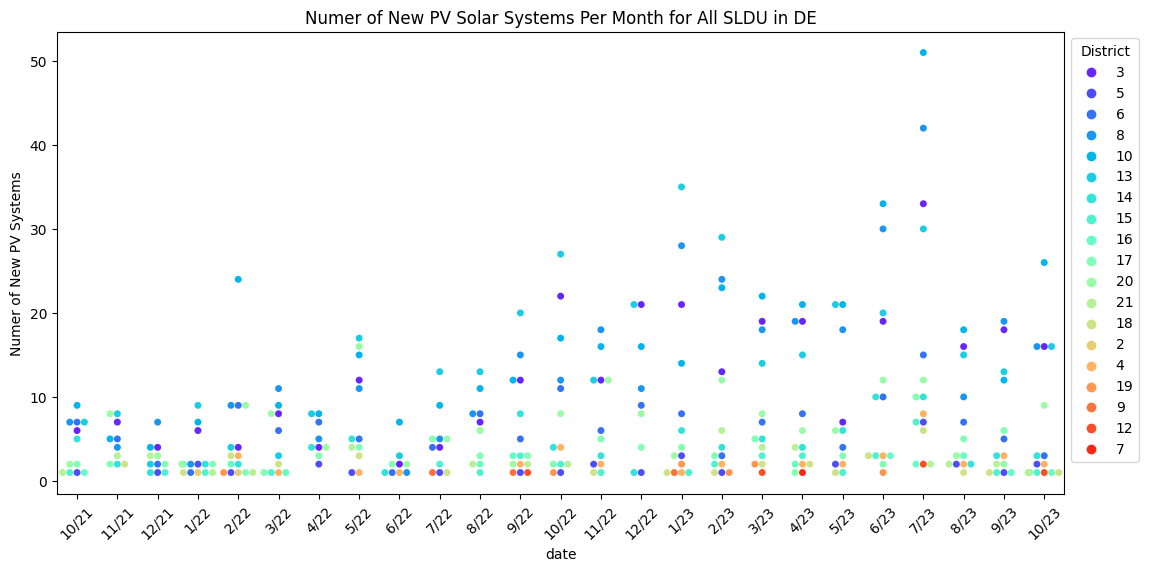

In [158]:
plt.figure(figsize=(13, 6))
sns.swarmplot(data=residential_df, x='date', y='system_count', 
              hue='district', palette='rainbow');
plt.legend(title='District',loc=0,bbox_to_anchor=(1,1))
plt.ylabel('Numer of New PV Systems')
plt.title('Numer of New PV Solar Systems Per Month for All SLDU in DE')
plt.xticks(rotation=45);

## 5.2. Total Rebate Metric

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

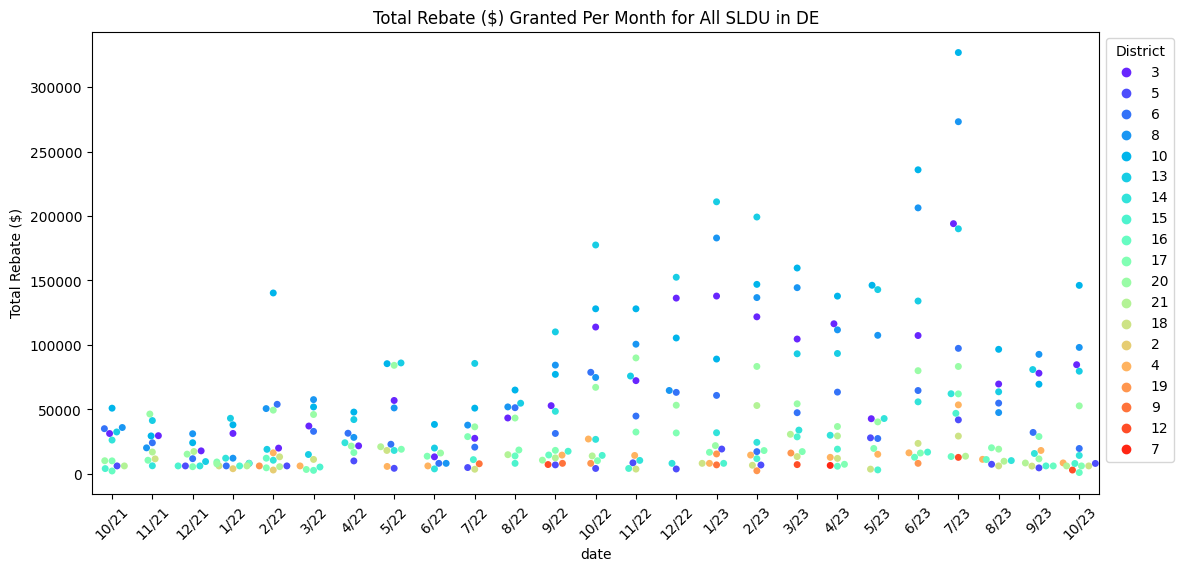

In [159]:
plt.figure(figsize=(13, 6))
sns.swarmplot(data=residential_df, x='date', y='rebate', 
              hue='district', palette='rainbow');
plt.legend(title='District',loc=0,bbox_to_anchor=(1,1))
plt.ylabel('Total Rebate ($)')
plt.title('Total Rebate ($) Granted Per Month for All SLDU in DE')
plt.xticks(rotation=45);

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

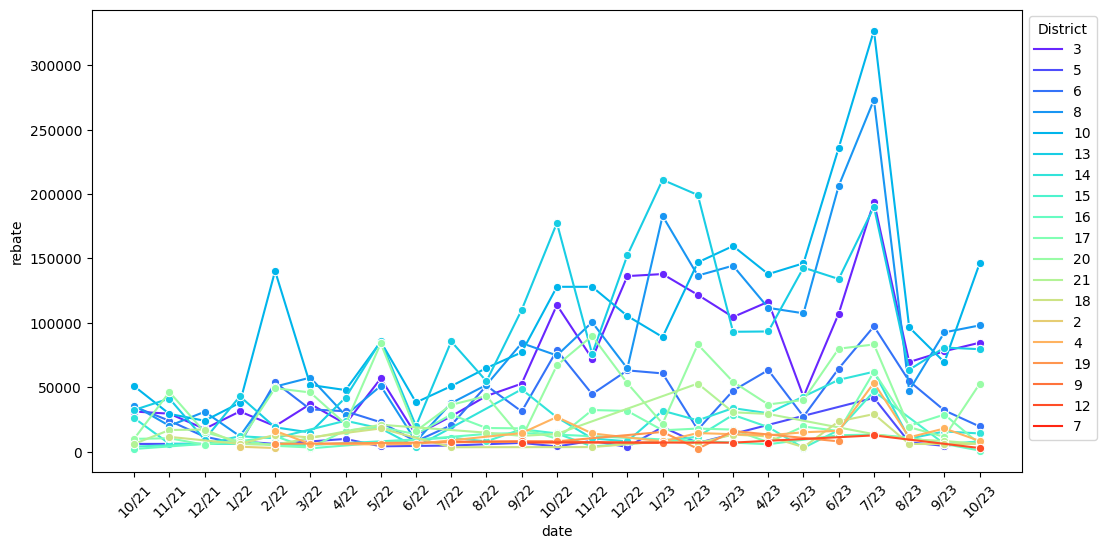

In [160]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=residential_df, 
             x='date', y='rebate', hue='district', 
             palette='rainbow', marker='o');
plt.legend(title='District',loc=0,bbox_to_anchor=(1,1))
plt.xticks(rotation=45);

## 5.3. Rebate Efficiency Metric

In [161]:
residential_df['rebate_eff(W/$)'] = residential_df.apply(
    lambda row: round(row['capacity'] / row['rebate'],2) if row['rebate'] != 0 else 0, axis=1)

In [162]:
residential_df.head(2)

,district,year,month,system_cost,system_count,rebate,capacity,geometry,date,rebate_eff(W/$)
0,3,2021,10,245282.0,6,31142.5,66855.0,"[POLYGON ((-75.608048 39.710708, -75.606219 39...",10/21,2.15
1,5,2021,10,45000.0,1,6000.0,13870.0,"[POLYGON ((-75.549211 39.809206, -75.548493 39...",10/21,2.31


In [163]:
data = residential_df.sort_values(by=['year','month']).reset_index(drop=True)

In [164]:
data.tail(5)

,district,year,month,system_cost,system_count,rebate,capacity,geometry,date,rebate_eff(W/$)
305,16,2023,10,28337.0,1,861.0,5740.0,"[POLYGON ((-75.569018 39.006762, -75.560477 39...",10/23,6.67
306,17,2023,10,43514.0,1,6000.0,9200.0,"[POLYGON ((-75.605241 39.164609, -75.60423 39....",10/23,1.53
307,18,2023,10,70744.0,1,6000.0,15795.0,"[POLYGON ((-75.7225990918529 38.8298593718107,...",10/23,2.63
308,20,2023,10,268250.0,9,52624.0,78035.0,"[POLYGON ((-75.312841 38.595473, -75.310057 38...",10/23,1.48
309,21,2023,10,71175.0,1,6000.0,18400.0,"[POLYGON ((-75.7128761553959 38.7056397580475,...",10/23,3.07


/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

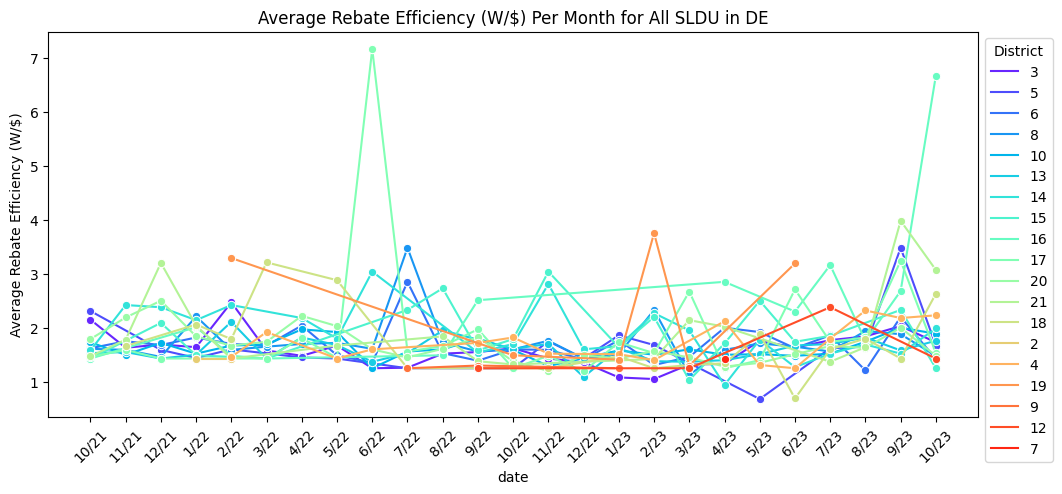

In [165]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=residential_df, 
             x='date', y='rebate_eff(W/$)', hue='district', 
             palette='rainbow', marker='o');
plt.legend(title='District',loc=0,bbox_to_anchor=(1,1))
plt.ylabel('Average Rebate Efficiency (W/$)')
plt.title('Average Rebate Efficiency (W/$) Per Month for All SLDU in DE')
plt.xticks(rotation=45);

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

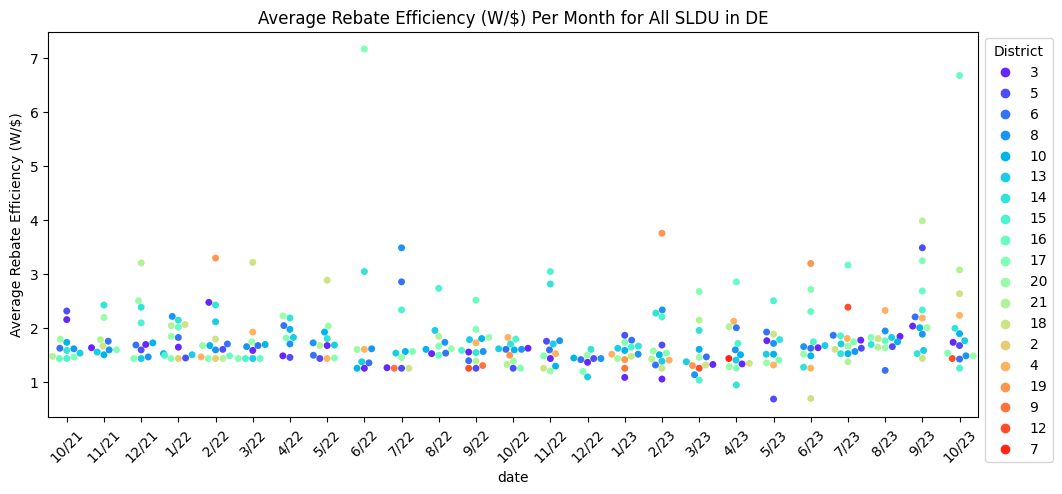

In [166]:
plt.figure(figsize=(12, 5))
sns.swarmplot(data=residential_df, 
             x='date', y='rebate_eff(W/$)', hue='district', 
             palette='rainbow', marker='o');
plt.legend(title='District',loc=0,bbox_to_anchor=(1,1))
plt.ylabel('Average Rebate Efficiency (W/$)')
plt.title('Average Rebate Efficiency (W/$) Per Month for All SLDU in DE')
plt.xticks(rotation=45);

In [167]:
residential_df[residential_df['district']=='2']

,district,year,month,system_cost,system_count,rebate,capacity,geometry,date,rebate_eff(W/$)
33,2,2022,1,29600.0,1,3822.0,5460.0,"[POLYGON ((-75.603601 39.666369, -75.603229 39...",1/22,1.43
47,2,2022,2,18367.0,1,2810.5,4015.0,"[POLYGON ((-75.603601 39.666369, -75.603229 39...",2/22,1.43


In [168]:
rebate_eff_df = residential_df[0:-13].groupby('district')['rebate_eff(W/$)'].agg(['mean','std']).reset_index()
rebate_eff_df = rebate_eff_df.round(2)
rebate_eff_df['district'] = rebate_eff_df['district'].astype('int64')
rebate_eff_df = rebate_eff_df.sort_values(by='mean',ascending=False).reset_index(drop=True)
rebate_eff_df

,district,mean,std
0,19,2.40,1.12
1,16,2.10,0.63
2,15,1.94,0.53
3,17,1.93,1.22
4,14,1.91,0.51
5,21,1.91,0.74
6,8,1.75,0.44
7,4,1.72,0.35
8,6,1.70,0.34
9,18,1.68,0.63


In [169]:
rebate_eff_df.fillna(value=0,inplace=True)

In [170]:
rebate_eff_df

,district,mean,std
0,19,2.40,1.12
1,16,2.10,0.63
2,15,1.94,0.53
3,17,1.93,1.22
4,14,1.91,0.51
5,21,1.91,0.74
6,8,1.75,0.44
7,4,1.72,0.35
8,6,1.70,0.34
9,18,1.68,0.63


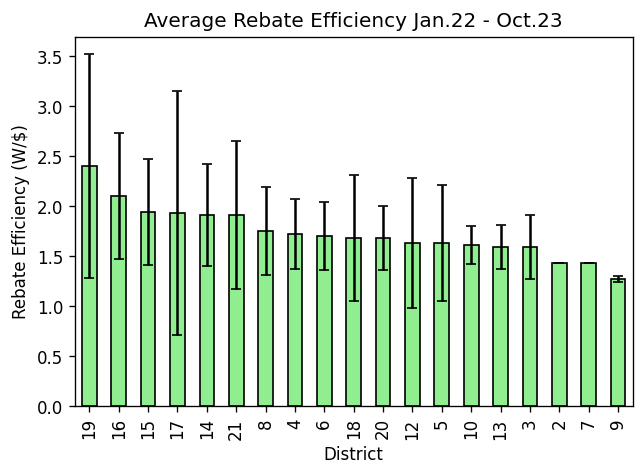

In [171]:
plt.figure(figsize=(6,4),dpi=120)
rebate_eff_df['mean'].plot.bar(yerr=rebate_eff_df['std'],capsize=3,facecolor='lightgreen',edgecolor='black')
# plt.ylim([0,6]);
plt.xticks(ticks=range(0,len(rebate_eff_df['mean'])),labels=rebate_eff_df['district'].tolist())
plt.ylabel('Rebate Efficiency (W/$)')
plt.xlabel('District')
plt.title('Average Rebate Efficiency Jan.22 - Oct.23');

## 5.4. Technology Cost Metric

In [172]:
residential_df['tech_cost($/W)'] = residential_df.apply(
    lambda row: round(row['system_cost'] / row['capacity'],2) if row['capacity'] != 0 else 0, axis=1)

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

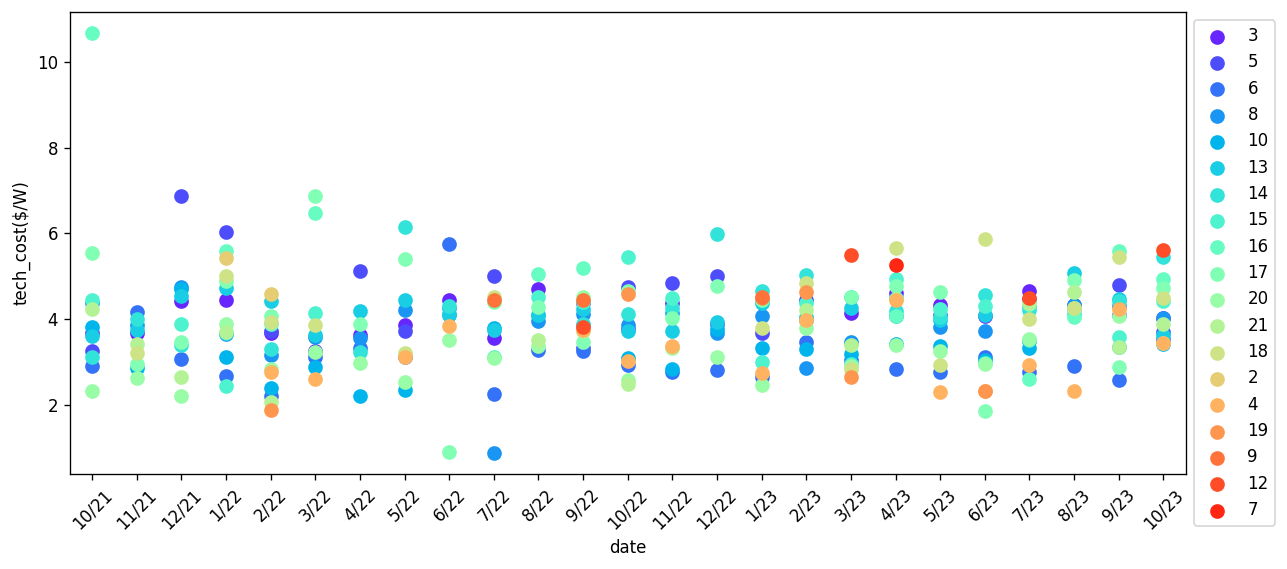

In [173]:
plt.figure(figsize=(12,5),dpi=120)
sns.pointplot(data=residential_df,x='date',y='tech_cost($/W)',
              hue='district',linestyles='',palette='rainbow')
plt.legend(loc=0,bbox_to_anchor=(1,1))
plt.xticks(rotation=45);

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

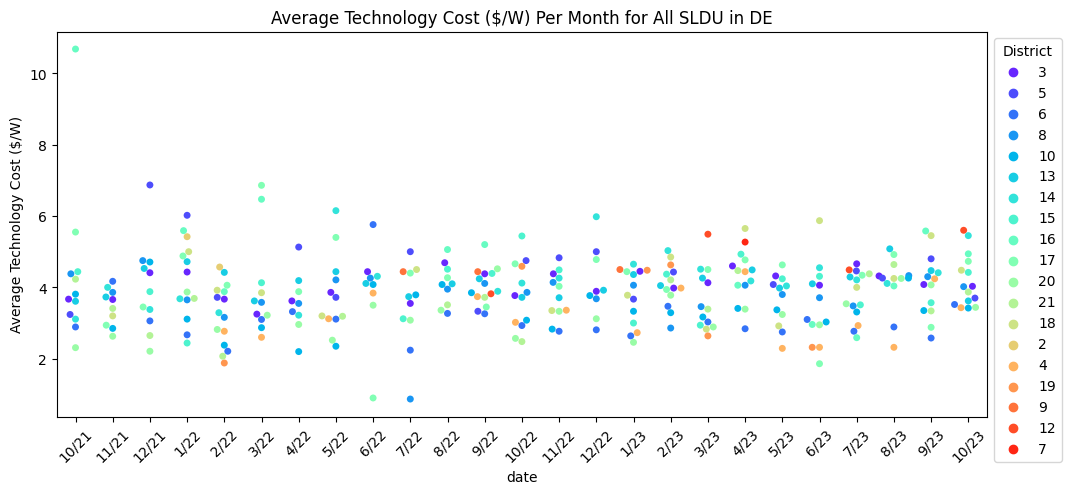

In [174]:
plt.figure(figsize=(12, 5))
sns.swarmplot(data=residential_df, 
             x='date', y='tech_cost($/W)', hue='district', 
             palette='rainbow', marker='o');
plt.legend(title='District',loc=0,bbox_to_anchor=(1,1))
plt.ylabel('Average Technology Cost ($/W)')
plt.title('Average Technology Cost ($/W) Per Month for All SLDU in DE')
plt.xticks(rotation=45);

In [175]:
dataframes = [var_name for var_name, var_value in globals().items() 
              if isinstance(var_value, pd.DataFrame) and not var_name.startswith('_')]

print(dataframes)

['GEPG_df', 'GEPG_PV_df', 'data', 'city_gdf', 'mapping_df', 'city_coordinates_df', 'mapping_gdf', 'sldu_gdf', 'filtered_gdf', 'joined_gdf', 'agg_data', 'all_sectors_gdf', 'nonResidential_df', 'residential_df', 'nonProfit_df', 'rebate_eff_df']


In [176]:
residential_df.head(2)

,district,year,month,system_cost,system_count,rebate,capacity,geometry,date,rebate_eff(W/$),tech_cost($/W)
0,3,2021,10,245282.0,6,31142.5,66855.0,"[POLYGON ((-75.608048 39.710708, -75.606219 39...",10/21,2.15,3.67
1,5,2021,10,45000.0,1,6000.0,13870.0,"[POLYGON ((-75.549211 39.809206, -75.548493 39...",10/21,2.31,3.24


In [177]:
residential_df['date'] = '1/' + residential_df['date'] 
residential_df

,district,year,month,system_cost,system_count,rebate,capacity,geometry,date,rebate_eff(W/$),tech_cost($/W)
0,3,2021,10,245282.0,6,31142.5,66855.0,"[POLYGON ((-75.608048 39.710708, -75.606219 39...",1/10/21,2.15,3.67
1,5,2021,10,45000.0,1,6000.0,13870.0,"[POLYGON ((-75.549211 39.809206, -75.548493 39...",1/10/21,2.31,3.24
2,6,2021,10,164089.0,7,34915.5,56685.0,"[POLYGON ((-75.350987 38.838665, -75.344918 38...",1/10/21,1.62,2.89
3,8,2021,10,252638.0,7,35815.0,57710.0,"[POLYGON ((-75.7886554614804 39.6595727948766,...",1/10/21,1.61,4.38
4,10,2021,10,336187.0,9,50820.0,88170.0,"[POLYGON ((-75.7850388190259 39.6062182015777,...",1/10/21,1.73,3.81
...,...,...,...,...,...,...,...,...,...,...,...
305,16,2023,10,28337.0,1,861.0,5740.0,"[POLYGON ((-75.569018 39.006762, -75.560477 39...",1/10/23,6.67,4.94
306,17,2023,10,43514.0,1,6000.0,9200.0,"[POLYGON ((-75.605241 39.164609, -75.60423 39....",1/10/23,1.53,4.73
307,18,2023,10,70744.0,1,6000.0,15795.0,"[POLYGON ((-75.7225990918529 38.8298593718107,...",1/10/23,2.63,4.48
308,20,2023,10,268250.0,9,52624.0,78035.0,"[POLYGON ((-75.312841 38.595473, -75.310057 38...",1/10/23,1.48,3.44


In [178]:
residential_df.drop('geometry',axis=1,inplace=True)

In [179]:
residential_df

,district,year,month,system_cost,system_count,rebate,capacity,date,rebate_eff(W/$),tech_cost($/W)
0,3,2021,10,245282.0,6,31142.5,66855.0,1/10/21,2.15,3.67
1,5,2021,10,45000.0,1,6000.0,13870.0,1/10/21,2.31,3.24
2,6,2021,10,164089.0,7,34915.5,56685.0,1/10/21,1.62,2.89
3,8,2021,10,252638.0,7,35815.0,57710.0,1/10/21,1.61,4.38
4,10,2021,10,336187.0,9,50820.0,88170.0,1/10/21,1.73,3.81
...,...,...,...,...,...,...,...,...,...,...
305,16,2023,10,28337.0,1,861.0,5740.0,1/10/23,6.67,4.94
306,17,2023,10,43514.0,1,6000.0,9200.0,1/10/23,1.53,4.73
307,18,2023,10,70744.0,1,6000.0,15795.0,1/10/23,2.63,4.48
308,20,2023,10,268250.0,9,52624.0,78035.0,1/10/23,1.48,3.44


In [180]:
residential_df.to_csv('./datasets/district_data.csv',index=False)

# 6. Saving CSV File to Azure

In [181]:
filename =  ['datasets/district_data.csv']

In [182]:
import azure
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import os
import re
import yaml

In [183]:
# As a class to preserve state
class AzureBlobStorageManager:
    def __init__(self, connection_str: str, container_name: str):
        self.blob_service_client = BlobServiceClient.from_connection_string(connection_str)
        self.container_client = self.blob_service_client.get_container_client(container_name)

    def upload_blob(self, local_path: str,  blob_name=None):
        """Upload a local file to blob storage in Azure"""

        # Default blob_name = local filename 
        if blob_name is None:
            blob_name = os.path.basename(local_path)
        blob_client = self.container_client.get_blob_client(blob_name)
        
        try:
            # Upload the blob
            with open(local_path, "rb") as data:
                blob_client.upload_blob(data,overwrite=True)
            print(f"Blob {blob_name} uploaded successfully.")
        except Exception as e: # Do something with this exception block (e.g. add logging)
            print(f"An error occurred: {str(e)}")

In [184]:
# Testing class and method 
#with open("azure_info.yaml", "r") as file: 
 #   azure_info = yaml.full_load(file)

connection_string =  # Azure container/Access Key/Under Key1, Connection String.
container_name =  # The name comes from Containers. 
local_path = filename

az_blob_manager = AzureBlobStorageManager(connection_str=connection_string,
                                          container_name=container_name)
for i in filename:
    az_blob_manager.upload_blob(i)

Blob district_data.csv uploaded successfully.
